In [1]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import os
import math
import numpy as np
import csv
from scipy.signal import find_peaks

In [2]:
file = "A4.wav"

In [3]:
def nota_index_in_nota_octava(nota_index):
    note = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
    nota = (nota_index - 1) % len(note)
    nota = note[nota]
    octava = (nota_index + 8) // len(note)

    return nota, octava


def frecv_in_nota_index(pitch):
    if not pitch:  # daca avem o valoare diferita de 0
        pitch += 1e-15
    # formula luata de pe https://en.wikipedia.org/wiki/Piano_key_frequencies
    nota_index = 12 * math.log2(pitch / 440) + 49
    offset_from_note = nota_index
    nota_index = round(nota_index)
    offset_from_note -= nota_index
    nota = nota_index_in_nota_octava(nota_index)

    return nota

In [4]:
def autocorelatie(path_fisier):
    y, sr = librosa.load(path_fisier)

    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(y, sr=sr)

    corr = np.correlate(y, y, 'full')[len(y) - 1:]

    peaks, dics = find_peaks(corr, height=0)
    top = np.argsort(corr[peaks])[-2:]
    ind = top[-1]
    pitch = sr / peaks[ind]

    plt.figure(figsize=(15,7))
    plt.plot(corr[:10000])
    plt.plot(peaks[top], corr[peaks[top]], "x")
    plt.xlabel('Lag (samples)')
    plt.xlim(0, 5000)
    plt.show()

    nota = frecv_in_nota_index(pitch)
    nota = ''.join(map(str, nota))
    
    print(ind)
    print(top)

    return nota, pitch

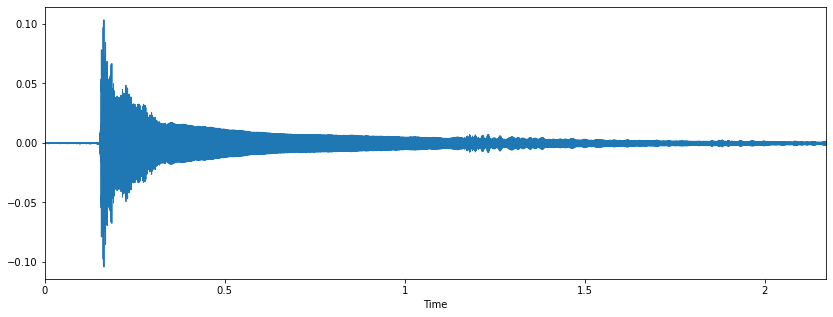

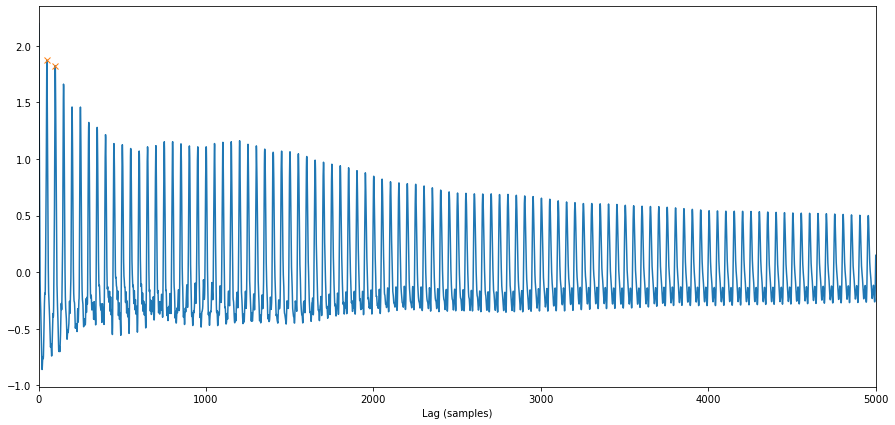

('A4', 441.0)

0
[1 0]


In [5]:
autocorelatie(file)